<a href="https://www.kaggle.com/code/janadarwish/nti-lap-10?scriptVersionId=264113482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=SVC(kernel='rbf',C=100000,gamma='scale')
model.fit(x_train,y_train)

SVC(C=100000)

In [10]:
y_pred=model.predict(x_test)

In [11]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6363636363636364

In [12]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[68, 31],
       [25, 30]])

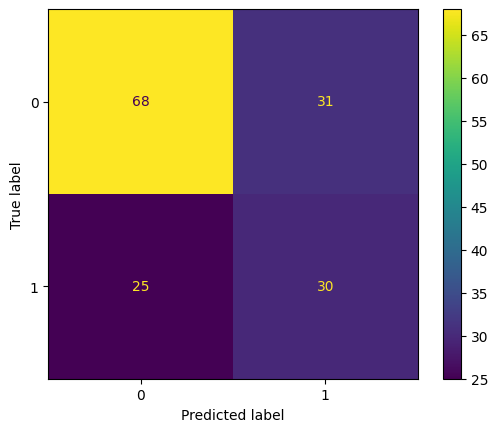

In [13]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

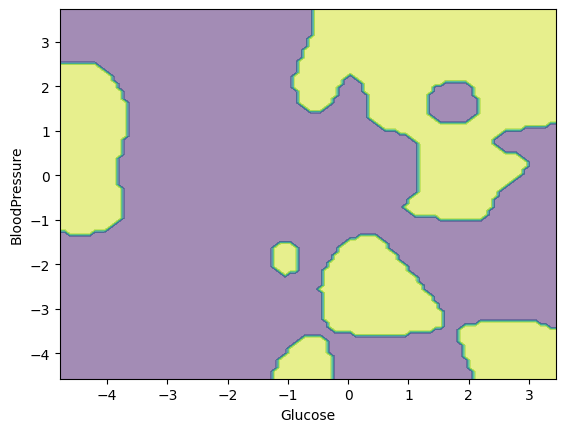

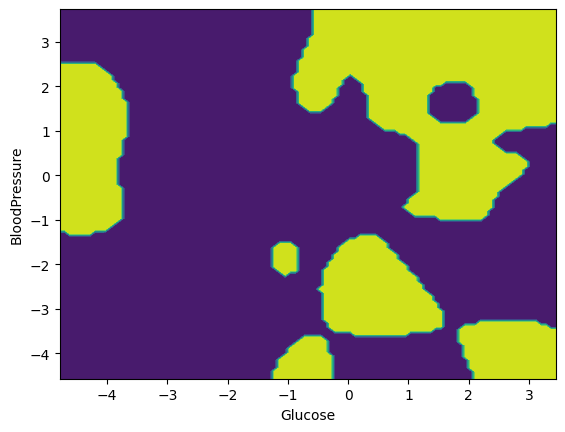

In [14]:
X_two_features = x_train[:, [1, 2]]

model.fit(X_two_features, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_two_features,
    response_method="predict",
    xlabel="Glucose",
    ylabel="BloodPressure",
    alpha=0.5
)

disp.plot()

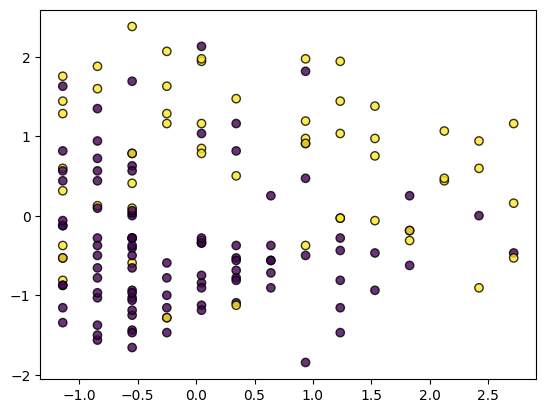

In [15]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,alpha=0.8,edgecolor='k')
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        99
           1       0.49      0.55      0.52        55

    accuracy                           0.64       154
   macro avg       0.61      0.62      0.61       154
weighted avg       0.65      0.64      0.64       154

